## Scipy Stats and an ANOVA hypothesis test


According to Scipy documentation it provides *fundamental algorithms for scientific computing in Python.*
Scipy stands for scientific python and this tool, although based on Pandas, provides more optomised algorithms.
Scipy is open source and is maintained on Github. It is a scientific computing language in the Python language.

Scipy.stats contains a large number of statistical functions.  

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import scipy.stats 


In [2]:
# The help function shows the range of scipy.stats [1]

help(scipy.stats)

Help on package scipy.stats in scipy:

NAME
    scipy.stats - .. _statsrefmanual:

DESCRIPTION
    Statistical functions (:mod:`scipy.stats`)
    
    .. currentmodule:: scipy.stats
    
    This module contains a large number of probability distributions as
    well as a growing library of statistical functions.
    
    Each univariate distribution is an instance of a subclass of `rv_continuous`
    (`rv_discrete` for discrete distributions):
    
    .. autosummary::
       :toctree: generated/
    
       rv_continuous
       rv_discrete
       rv_histogram
    
    Continuous distributions
    
    .. autosummary::
       :toctree: generated/
    
       alpha             -- Alpha
       anglit            -- Anglit
       arcsine           -- Arcsine
       argus             -- Argus
       beta              -- Beta
       betaprime         -- Beta Prime
       bradford          -- Bradford
       burr              -- Burr (Type III)
       burr12            -- Burr (Type XII)
   

Scipy has a package or module scipy.stats that contains a huge number of statistical functions. 
Statistics is a very broad area, here are some of the functions provided by scipy.stats to analyse data:
Summary Statistics, Frequency Statistics, Statistical tests, Probability distribution, Frequency statistics,
Correlation functions, Quasi-Monte Carlo and Masked statistics functions

Following are some examples of the range of computations which are aided by scipy.stats:

A lognormal (log-normal or Galton) distribution is a probability distribution with a normally distributed logarithm. 
lognormally distributed data does not form a symmetric shape but rather slants or skews more towards the right.
It is a random variable that is lognormal continuous.  The syntax is;
scipy.stats.lognorm.method_name(data,loc,size,moments,scale)  
Some methods which act on the algorithm are; .CDF() which gets the cumulative distribution function; .stats gets the standard 
deviation, mean, kurtosis and skew.
 
Scipy.stats.norm represents the random variable that is normally continuous. It has different kinds of functions for normal distribution 
like CDF, PDF, median, etc.  Its syntax is;
scipy.stats.norm.method_name(data,loc,size,moments,scale)
This function does similar to above but with the normal distribution.

The Pearsonr is a Pearson correlation coefficient that is used to demonstrate the linear relationship between two variables and
datasets. The method pearsonr() in the subpackage scipy.stats is used for that. The syntax is given below;
scipy.stats.pearsonr(x, y)

The chi-square test tests the variation between actual and expected results in statistics. It is used in hypothesis testing. 
It is applied to categorical data.  In scipy, there is a method chi-square within subpackage scipy.stats to do the testing.
This is the syntax;
scipy.stats.chisquare(f_obs, f_exp=None, ddof=0) [2]




ANOVA, or analysis of variance, is a statistical method of analysing the differences between means of more than two groups.  
A one way ANOVA has one independent variable and a two way ANOVA has two independent variables.  A one-way ANOVA is used
when you have collected data about one categorical independent variable and one quantitative dependent variable.  There should
be at least three levels of the independent variable. ANOVA tells you if the dependent variable changes according to the 
level of the independent variable. 

The dataset I have downloaded is an imaginary crop yield experiment contains data about: fertilizer type (type 1, 2, or 3),
planting density (1 = low density, 2 = high density), planting location in the field (blocks 1, 2, 3, or 4)
final crop yield (in bushels per acre). [3]  The independent variables are fertilizer type, planting density and planting location. The dependent variable is the crop yield.

For example ANOVA will determine whether the groups created by the levels of the independent variable, fertilizer,  are 
statistically different.  ANOVA calculates whether the statistical means of fertilizer type 1, 2 or 3 are different from the overall mean of the dependent variable.

If any of the means of fertilizer groups 1, 2 or 3 is significantly different from the overall mean, then the null hypothesis is rejected.  The null hypothesis states that there is no correlation between the independent and dependent variables.

ANOVA uses the F-test for statistical significance which compares multiple means at the same time. The F-test compares the 
variance in each group mean from the overall variance of means. If the variance within groups is smaller than the variance 
between groups, the F-test will find a higher F-value, and therefore a higher likelihood that the difference observed is real 
and not due to chance.  The opposite will confirm the null hypothesis.





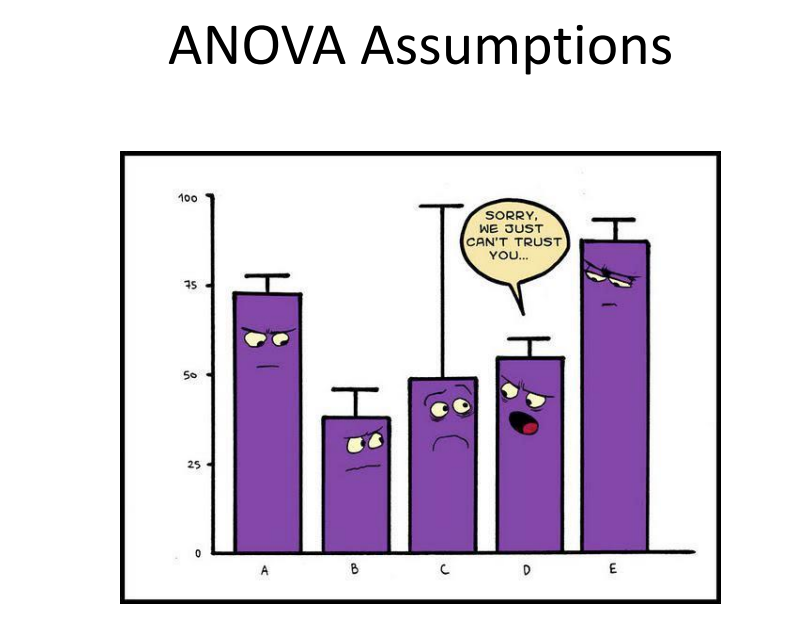


Image [4]
Assumption 1: Your dependent variable should be measured at the interval or ratio level (i.e., they are continuous).
Assumption 2: Your independent variable should consist of two or more categorical, independent groups. 
Assumption 3: You should have independence of observations, which means that there is no relationship between the 
    observations in each group or between the groups themselves.
Assumption 4: There should be no significant outliers.
Assumption 5: Your dependent variable should be approximately normally distributed for each category of the 
independent variable. 
Assumption 6: There needs to be homogeneity of variances. [5]



In [3]:
# importing the data [3]
yield_data = pd.read_csv('/Users/mahon/Downloads/crop.data_.anova_/crop.data.csv')

In [4]:
# observe the data to plan analysis
yield_data


,density,block,fertilizer,yield
0,1,1,1,177.228692
1,2,2,1,177.550041
2,1,3,1,176.408462
3,2,4,1,177.703625
4,1,1,1,177.125486
...,...,...,...,...
91,2,4,3,177.405292
92,1,1,3,178.141644
93,2,2,3,177.710613
94,1,3,3,177.687264


In [5]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.htmlay [6]

# displaying all data, remove # before yield_data to see all.

pd.set_option('display.max_rows',96)
pd.set_option('display.max_columns',4)

#yield_data

In [6]:
# basic statistics of data
print(yield_data.describe())

         density      block  fertilizer       yield
count  96.000000  96.000000   96.000000   96.000000
mean    1.500000   2.500000    2.000000  177.015476
std     0.502625   1.123903    0.820783    0.664548
min     1.000000   1.000000    1.000000  175.360840
25%     1.000000   1.750000    1.000000  176.468696
50%     1.500000   2.500000    2.000000  177.058105
75%     2.000000   3.250000    3.000000  177.398571
max     2.000000   4.000000    3.000000  179.060899


In [7]:
# the independent variable, the integers 1,2 & 3 refer to 3 types of fertilizer
# this is the categorical variable and has 3 categories fulfilling Assumption 2. 
independent = yield_data['fertilizer']
independent

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    2
33    2
34    2
35    2
36    2
37    2
38    2
39    2
40    2
41    2
42    2
43    2
44    2
45    2
46    2
47    2
48    2
49    2
50    2
51    2
52    2
53    2
54    2
55    2
56    2
57    2
58    2
59    2
60    2
61    2
62    2
63    2
64    3
65    3
66    3
67    3
68    3
69    3
70    3
71    3
72    3
73    3
74    3
75    3
76    3
77    3
78    3
79    3
80    3
81    3
82    3
83    3
84    3
85    3
86    3
87    3
88    3
89    3
90    3
91    3
92    3
93    3
94    3
95    3
Name: fertilizer, dtype: int64

In [8]:
# means of yields from fertilizer 1, 2 and 3.
fert = yield_data.groupby('fertilizer')[['yield']].mean().reset_index()
fert

,fertilizer,yield
0,1,176.757044
1,2,176.933213
2,3,177.356170


In [10]:
# yield of crop related to the density of seed sown.
density = yield_data.groupby('density')[['yield']].mean().reset_index()
density

,density,yield
0,1,176.784498
1,2,177.246454


In [11]:
# yield of crop related to which block of the field in which it was planted.
block = yield_data.groupby('block')[['yield']].mean().reset_index()
block

,block,yield
0,1,176.856386
1,2,177.316881
2,3,176.712609
3,4,177.176027


In [12]:
# The dependent variable is measured at the interval level, fulfilling Assumption 1.
dependent = yield_data['yield']
dependent

0     177.228692
1     177.550041
2     176.408462
3     177.703625
4     177.125486
5     176.778342
6     176.746302
7     177.061164
8     176.274949
9     177.967203
10    176.601300
11    177.030543
12    177.479507
13    176.874130
14    176.114388
15    176.008395
16    176.108313
17    178.357441
18    177.262445
19    176.918845
20    176.239016
21    176.573070
22    176.039298
23    176.817922
24    176.160587
25    177.226424
26    175.938533
27    177.164937
28    175.360840
29    177.276996
30    175.945444
31    175.882780
32    176.479341
33    176.044342
34    177.412462
35    177.360818
36    177.385499
37    176.975808
38    177.379779
39    177.997995
40    176.434863
41    176.933265
42    175.983480
43    177.034093
44    176.436762
45    176.067745
46    177.121049
47    177.197721
48    176.603724
49    177.208171
50    177.148829
51    176.819077
52    176.999067
53    178.134605
54    176.429156
55    176.668323
56    176.895867
57    177.779493
58    176.4144

In [13]:
# Describe the dependent variable 
dependent.describe()


count     96.000000
mean     177.015476
std        0.664548
min      175.360840
25%      176.468696
50%      177.058105
75%      177.398571
max      179.060899
Name: yield, dtype: float64

C:\Users\mahon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='yield'>

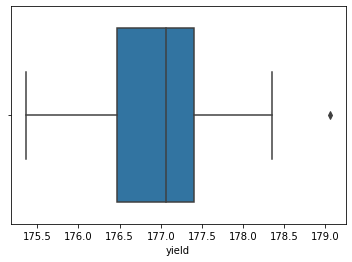

In [14]:
# Investigating for outliers.
sns.boxplot(dependent)


The boxplot shows most of the statistical data.  50% of the data is between the 1st quartile and the 3rd quartile. The remaining data stretches out to the whiskers, at the 1st and 4th quartiles.  The median is 177 approx and there is one outlier.  The outliers are beyond the whiskers which are calculated at 1.5 
times the interquartile range.


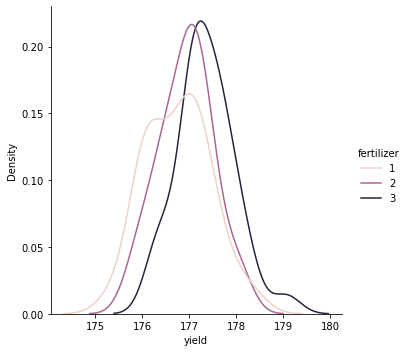

In [15]:
# this plot is a kernal density estimate shows that the distributions are close to normal, with fertilizer 2 showing a normal 
# distribution centered on the median value.  This satisfies the requirement of Assumption 5.
sns.displot(x = dependent, hue = independent, kind = 'kde')

In [16]:
# Shapiro Wilk test will check if the instances belong to the Normal Distribution.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html[6]

scipy.stats.shapiro(independent)
# The pvalue of .0000000002657... demonstrates an almost perfect normal distribution.

ShapiroResult(statistic=0.7929161787033081, pvalue=2.6757251969655726e-10)

To test Assumption 6 use the levene test which tests homogeneity of variance.
Variance measures how far obserbed values are away from the mean. The variance 
of a random variable x is the sum of (x minus mean) squared.  If there is little variance the dataset is a poor one for an ANOVA.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html [7]

In [17]:
# levene test for homogeneity of variance. Fa, Fb and Fc are fertilizers 1, 2 & 3.

from scipy.stats import levene

Fa = [177.228692, 177.550041, 176.408462, 177.703625, 177.125486, 176.778342, 176.746302, 177.061164, 176.274949, 177.967203, 
      176.601300, 177.030543, 177.479507, 176.874130, 176.114388, 176.008395, 176.108313, 178.357441, 177.262445, 176.918845, 
      176.239016, 176.573070, 176.039298, 176.817922, 176.160587, 177.226424, 175.938533, 177.164937, 175.360840, 177.276996, 
      175.945444, 175.882780]

Fb = [176.479341, 176.044342, 177.412462, 177.360818, 177.385499, 176.975808, 177.379779, 177.997995, 176.434863, 176.933265, 
      175.983480, 177.034093, 176.436762, 176.067745, 177.121049, 177.197721, 176.603724, 177.208171, 177.148829, 176.819077, 
      176.999067, 178.134605, 176.429156, 176.668323, 176.895867, 177.779493, 176.414495, 176.878898, 177.580683, 176.957269, 
      175.747546, 177.352595]

Fc = [177.104186, 178.079635, 176.903422, 177.540284, 177.032710, 178.286042, 176.405410, 176.430830, 177.396331, 176.925576,
        177.055046, 177.344164, 177.128368, 177.168302, 176.353941, 179.060899, 176.300517, 177.593352, 177.115245, 177.794457,
        177.004038, 178.036858, 177.701366, 177.632808, 177.652275, 177.100418, 177.187967, 177.405292, 178.141644, 177.710613, 177.687264, 177.118176]

stat, p = levene(Fa, Fb, Fc)
p

0.43190246183556

https://www.statisticshowto.com/levene-test/ [8]
    
Variance is calculated as the square of the standard deviation.  A p score is
non-significant (greater than .05) indicates you have met the 
assumption of homogeneity of variance (i.e., equal variances are assumed).
A significant result here (less than .05) indicates you have violated the assumption of homogeneity of variance (i.e., equal variances are not assumed).

The yield_data dataset is greater than .05 so it meets Assumption 6, the homogeneity of variance.

In [ ]:

## One-Way ANOVA  
(scipy.stats.f_oneway)[9]
https://www.geeksforgeeks.org/how-to-perform-a-one-way-anova-in-python/[10]


    
My dataset has met Assumptions 1,2,3,5 & 6 so will be suitable to perform an ANOVA.

One-Way ANOVA in Python: One-way ANOVA (also known as “analysis of variance”) is a test that is used to find out whether 
there exists a statistically significant difference between the mean values of more than one group.


In [18]:
# ANOVA
scipy.stats.f_oneway(Fa, Fb, Fc)

F_onewayResult(statistic=7.862750803308594, pvalue=0.0006999162543233916)

https://www.statology.org/anova-f-value-p-value/ [11]
    
Using Post-Hoc Tests with an ANOVA
When the p-value of an ANOVA is less than .05, we can reject the null hypothesis that each group mean is equal.  In our data 
the pvalue is below .05 so the group means are not equal, we can then perform post-hoc tests to determine exactly which groups 
differ from each other.

Some post-hoc tests which can be used following an ANOVA are; Tukey Test, Bonferroni Testand Scheffe Test.  I will do the 
Tukey test.

In [19]:
# https://nathancarter.github.io/how2data/site/how-to-perform-post-hoc-analysis-with-tukey [12]

# Alternative Hypothesis - Looking at the mean differences it is likely 1 & 2 share the true mean of the population.

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
tukey = pairwise_tukeyhsd(endog=yield_data['yield'], groups=yield_data['fertilizer'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.1762 0.4968 -0.1937 0.5461  False
     1      3   0.5991  0.001  0.2292  0.969   True
     2      3    0.423 0.0209  0.0531 0.7929   True
---------------------------------------------------


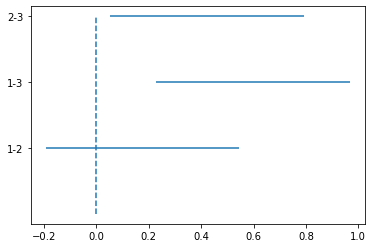

In [20]:
# This plot shows the above data.

rows = tukey.summary().data[1:]
plt.hlines( range(len(rows)), [row[4] for row in rows], [row[5] for row in rows] )
plt.vlines( 0, -1, len( rows )-1, linestyles='dashed' )
plt.gca().set_yticks( range( len( rows ) ) )
plt.gca().set_yticklabels( [ f'{x[0]}-{x[1]}' for x in rows ] )
plt.show()

Confidence intervals that cross the vertical, dashed line at x = 0 are those in which 
the means across those groups may be equal. Other intervals have mean differences 
whose 95% confidence intervals do not include zero.
A confidence interval (CI) is a range of values that's likely to include a population value 
with a certain degree of confidence. The CI is denoted as a % where a population mean lies 
between an upper and lower interval.
The 95% confidence interval is a range of values that you can be 95% certain contains the 
true mean of the population.  Larger samples are more reliable than smaller samples.
In this plot we can see that the Alternative Hypothesis is correct.  Fertilizer 1 and 2
likely contain the true mean of the population.  This is not true for 1 and 3 or 2 and 3.


### Citations:
    
    [1] https://scipy.org/
    [2] https://pythonguides.com/scipy-stats/
    [3] https://www.scribbr.com/statistics/one-way-anova/
    [4] https://sites.ualberta.ca/~lkgray/uploads/7/3/6/2/7362679/slides_-_anova_assumptions.pdf
    [5] https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php
    [6] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
    [7] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
    [8] https://www.statisticshowto.com/levene-test/
    [9] (scipy.stats.f_oneway)
    [10] https://www.geeksforgeeks.org/how-to-perform-a-one-way-anova-in-python/
    [11] https://www.statology.org/anova-f-value-p-value/
    [12] https://nathancarter.github.io/how2data/site/how-to-perform-post-hoc-analysis-with-tukey
        

    